In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
train = pd.read_csv('/Users/anapedra/Desktop/kaggle/binary class software def/playground-series-s3e23/train.csv')
test  = pd.read_csv('/Users/anapedra/Desktop/kaggle/binary class software def/playground-series-s3e23/test.csv')

train.head()

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,0,22.0,3.0,1.0,2.0,60.0,278.63,0.06,19.56,14.25,...,17,1,1,0,16.0,9.0,38.0,22.0,5.0,False
1,1,14.0,2.0,1.0,2.0,32.0,151.27,0.14,7.00,21.11,...,11,0,1,0,11.0,11.0,18.0,14.0,3.0,False
2,2,11.0,2.0,1.0,2.0,45.0,197.65,0.11,8.05,22.76,...,8,0,1,0,12.0,11.0,28.0,17.0,3.0,False
3,3,8.0,1.0,1.0,1.0,23.0,94.01,0.19,5.25,17.86,...,4,0,2,0,8.0,6.0,16.0,7.0,1.0,True
4,4,11.0,2.0,1.0,2.0,17.0,60.94,0.18,5.63,12.44,...,7,0,2,0,7.0,6.0,10.0,10.0,3.0,False


In [3]:
print("Columns:", train.shape[1])
print("Rows:", train.shape[0])

Columns: 23
Rows: 101763


# EDA

## Missing values

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101763 entries, 0 to 101762
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 101763 non-null  int64  
 1   loc                101763 non-null  float64
 2   v(g)               101763 non-null  float64
 3   ev(g)              101763 non-null  float64
 4   iv(g)              101763 non-null  float64
 5   n                  101763 non-null  float64
 6   v                  101763 non-null  float64
 7   l                  101763 non-null  float64
 8   d                  101763 non-null  float64
 9   i                  101763 non-null  float64
 10  e                  101763 non-null  float64
 11  b                  101763 non-null  float64
 12  t                  101763 non-null  float64
 13  lOCode             101763 non-null  int64  
 14  lOComment          101763 non-null  int64  
 15  lOBlank            101763 non-null  int64  
 16  lo

We can see that there are no missing values.

In [5]:
train.describe()

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,...,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
count,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,...,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000
mean,50881.000000,37.347160,5.492684,2.845022,3.498826,96.655995,538.280956,0.111634,13.681881,27.573007,...,1141.357982,22.802453,1.773945,3.979865,0.196604,11.896131,15.596671,57.628116,39.249698,9.839549
std,29376.592059,54.600401,7.900855,4.631262,5.534541,171.147191,1270.791601,0.100096,14.121306,22.856742,...,9862.795472,38.541010,5.902412,6.382358,0.998906,6.749549,18.064261,104.537660,71.692309,14.412769
min,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,25440.500000,13.000000,2.000000,1.000000,1.000000,25.000000,97.670000,0.050000,5.600000,15.560000,...,31.380000,7.000000,0.000000,1.000000,0.000000,8.000000,7.000000,15.000000,10.000000,3.000000
50%,50881.000000,22.000000,3.000000,1.000000,2.000000,51.000000,232.790000,0.090000,9.820000,23.360000,...,125.400000,14.000000,0.000000,2.000000,0.000000,11.000000,12.000000,30.000000,20.000000,5.000000
75%,76321.500000,42.000000,6.000000,3.000000,4.000000,111.000000,560.250000,0.150000,18.000000,34.340000,...,565.920000,26.000000,1.000000,5.000000,0.000000,16.000000,20.000000,66.000000,45.000000,11.000000
max,101762.000000,3442.000000,404.000000,165.000000,402.000000,8441.000000,80843.080000,1.000000,418.200000,569.780000,...,935923.390000,2824.000000,344.000000,219.000000,43.000000,410.000000,1026.000000,5420.000000,3021.000000,503.000000


In [6]:
df = train[train['lOCode'] + train['lOComment'] != train['locCodeAndComment']]
df.head()

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,0,22.0,3.0,1.0,2.0,60.0,278.63,0.06,19.56,14.25,...,17,1,1,0,16.0,9.0,38.0,22.0,5.0,False
1,1,14.0,2.0,1.0,2.0,32.0,151.27,0.14,7.00,21.11,...,11,0,1,0,11.0,11.0,18.0,14.0,3.0,False
2,2,11.0,2.0,1.0,2.0,45.0,197.65,0.11,8.05,22.76,...,8,0,1,0,12.0,11.0,28.0,17.0,3.0,False
3,3,8.0,1.0,1.0,1.0,23.0,94.01,0.19,5.25,17.86,...,4,0,2,0,8.0,6.0,16.0,7.0,1.0,True
4,4,11.0,2.0,1.0,2.0,17.0,60.94,0.18,5.63,12.44,...,7,0,2,0,7.0,6.0,10.0,10.0,3.0,False


Just to clarify: lOCodeAndComment is the number of lines that have both code and comment. It isn't the sum of lOCode and lOComment.

In [7]:
# Change column names to something easier to understand

#Attribute Information:
# % 	
# %      1. loc             : numeric % McCabe's line count of code
# %      2. v(g)            : numeric % McCabe "cyclomatic complexity"
# %      3. ev(g)           : numeric % McCabe "essential complexity"
# %      4. iv(g)           : numeric % McCabe "design complexity"
# %      5. n               : numeric % Halstead total operators + operands
# %      6. v               : numeric % Halstead "volume"
# %      7. l               : numeric % Halstead "program length"
# %      8. d               : numeric % Halstead "difficulty"
# %      9. i               : numeric % Halstead "intelligence"
# %     10. e               : numeric % Halstead "effort"
# %     11. b               : numeric % Halstead 
# %     12. t               : numeric % Halstead's time estimator
# %     13. lOCode          : numeric % Halstead's line count
# %     14. lOComment       : numeric % Halstead's count of lines of comments
# %     15. lOBlank         : numeric % Halstead's count of blank lines
# %     16. lOCodeAndComment: numeric
# %     17. uniq_Op         : numeric % unique operators
# %     18. uniq_Opnd       : numeric % unique operands
# %     19. total_Op        : numeric % total operators
# %     20. total_Opnd      : numeric % total operands
# %     21: branchCount     : numeric % of the flow graph
# %     22. defects         : {false,true} % module has/has not one or more 
# %                                        % reported defects

## Duplicates

In [8]:
train.duplicated().sum()

0

# Correlations

<Axes: >

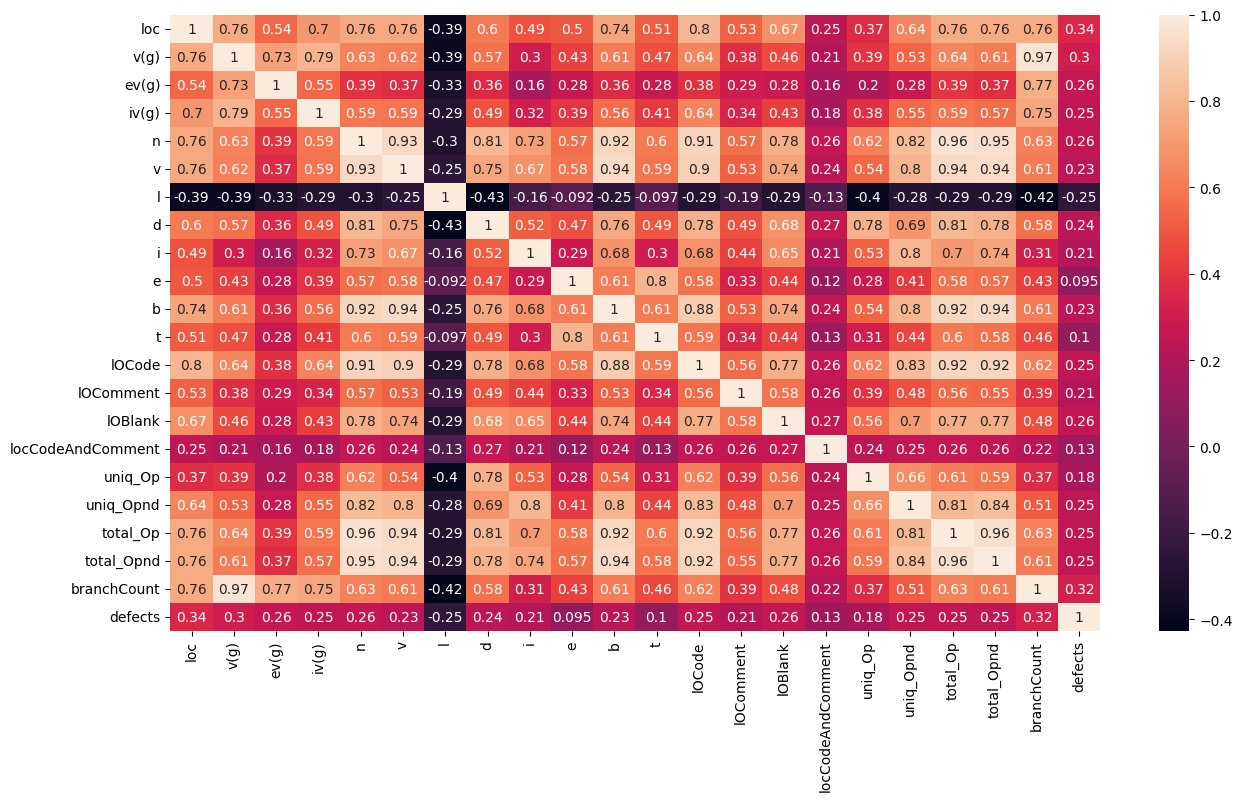

In [9]:
corr_matrix = train.drop('id',axis=1).corr()  # Get correlation matrix, but remove id colun since it's not a quantity we care about

plt.figure(figsize=(15,8))
sns.heatmap(corr_matrix, annot=True)

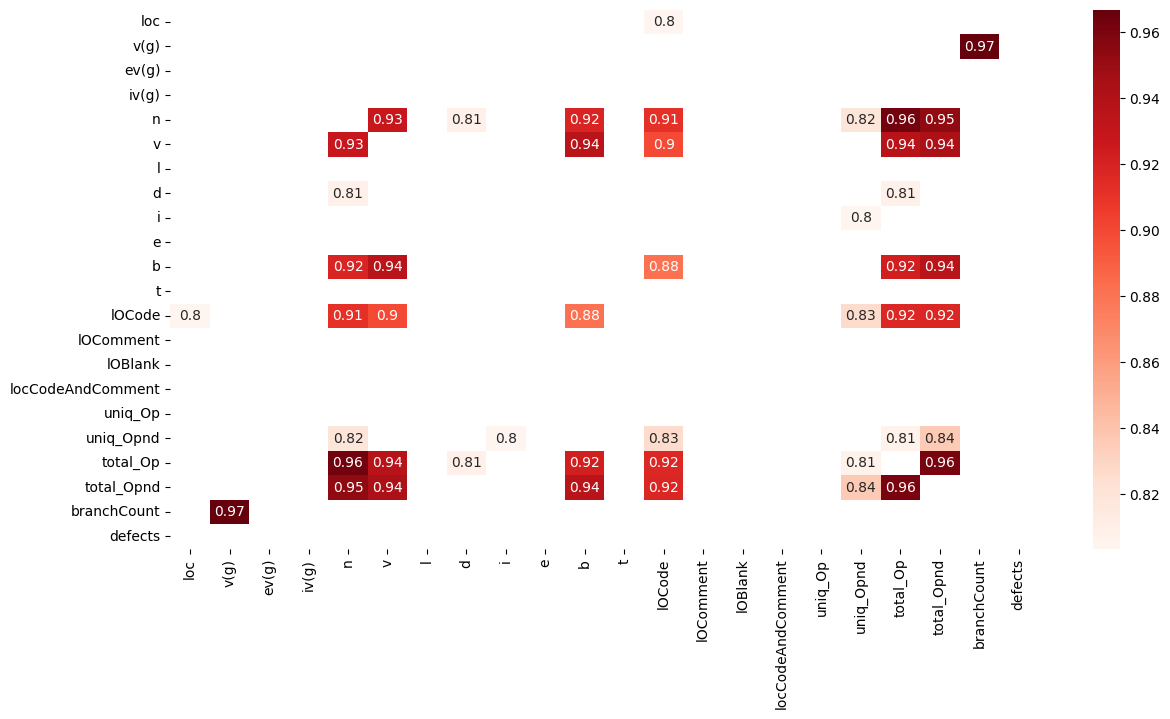

In [10]:
dfCorr = train.drop('id', axis=1).corr()
filteredDf = dfCorr[((dfCorr >= .8) | (dfCorr <= -.8)) & (dfCorr !=1.000)]
plt.figure(figsize=(14,7))
sns.heatmap(filteredDf, annot=True, cmap="Reds")
plt.show()

In [11]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(train.drop('id',axis=1), 20))

Top Absolute Correlations
v(g)       branchCount    0.966702
n          total_Op       0.963373
total_Op   total_Opnd     0.960626
n          total_Opnd     0.953080
v          total_Opnd     0.942189
           total_Op       0.936446
b          total_Opnd     0.935335
v          b              0.935263
n          v              0.928390
b          total_Op       0.922115
n          b              0.918254
lOCode     total_Opnd     0.917253
           total_Op       0.916913
n          lOCode         0.911761
v          lOCode         0.899258
b          lOCode         0.881238
uniq_Opnd  total_Opnd     0.836152
lOCode     uniq_Opnd      0.826105
n          uniq_Opnd      0.818994
           d              0.808291
dtype: float64


In [12]:
sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
                  .stack()
                  .sort_values(ascending=False))
sol

v(g)      branchCount    0.966702
n         total_Op       0.963373
total_Op  total_Opnd     0.960626
n         total_Opnd     0.953080
v         total_Opnd     0.942189
                           ...   
v(g)      l             -0.387270
loc       l             -0.388018
l         uniq_Op       -0.399440
          branchCount   -0.416185
          d             -0.426309
Length: 231, dtype: float64

# Feature engineering

In [13]:
train["defects"] = train["defects"].map({False: 0,True: 1})

Notes:
Converted defects to numeric for modeling.

In [14]:
def new_features(df):
    df["complexity"] = df["v(g)"] * df["ev(g)"] * df["iv(g)"]
    df["ComplexEffort"] =  df["complexity"] * df["e"]
    df["LocToLen"] = df["loc"] / (df["l"] + 0.0001)

new_features(train)
new_features(test)

New Features:
complexity: Calculates Total Complexity of the Code
ComplexityEffort: Calculates Complexity per effort
LocToLen: Calculates Code Length / Program Length

In [15]:
def corr_skew_outliner(df, cols):

    #outliner and #skewness part
    for col in cols:
        Q1 = df[col].quantile(0.01)
        Q3 = df[col].quantile(0.95)
        df.loc[df[col] < Q1, col] = Q1
        df.loc[df[col] > Q3, col] = Q3
        df[col] = np.sqrt(df[col])
        
    #correlation part
    correlation = df[cols].corr().abs()
    triangle = correlation.where(np.triu(np.ones(correlation.shape), k=1).astype(np.bool))
    drop_list = [column for column in triangle.columns if any(triangle[column] > 0.91)]
    df.drop(drop_list, axis=1, inplace=True)
        
    return df

In [16]:
train = corr_skew_outliner(train,train.drop(["defects"],axis=1).columns)
test = corr_skew_outliner(test,test.columns)

/var/folders/9m/cm8vlksd0617kfc4k14n_f9w0000gn/T/ipykernel_46770/2924635421.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '1017.62' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col] < Q1, col] = Q1
/var/folders/9m/cm8vlksd0617kfc4k14n_f9w0000gn/T/ipykernel_46770/2924635421.py:13: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.
  triangle = correlation.where(np.triu(np.ones(correlation.shape), k=1).astype(np.bool))


AttributeError: module 'numpy' has no attribute 'bool'.
`np.bool` was a deprecated alias for the builtin `bool`. To avoid this error in existing code, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [ ]:
new_num_cols=[col for col in train.columns if (train[col].dtype in ["int64","float64"])]

In [ ]:
plt.figure(figsize=(16,16))
corr=train.corr(numeric_only=True)
mask= np.triu(np.ones_like(corr))
sns.heatmap(corr, annot=True, fmt=".1f", linewidths=1, mask=mask)
plt.show()

In [ ]:
[print(f" Drop : {x}") for x in (set(num_cols)-set(new_num_cols))];

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score
X= train.drop("defects", axis=1)
y= train["defects"]


X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.1, random_state = 972, stratify=y)